<h2 style="text-align:center;">DETECTING BOT-CONTROLLED ACCOUNTS ON SOCIAL MEDIA USING MACHINE LEARNING TECHNIQUES</h2>

### 1. Import Data Manipulation Libraries

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action="ignore")

### 2. Import Datasets

In [2]:
# Genuine Account CSV files
genuine_accounts_tweets_path = '/kaggle/input/social-bot-dataset/dataset/cresi_2017_dataset/genuine_accounts/tweets.csv'
genuine_accounts_users_path = '/kaggle/input/social-bot-dataset/dataset/cresi_2017_dataset/genuine_accounts/users.csv'


# Spam Bot Account CSV files
spam_accounts_tweets_path_1 = '/kaggle/input/social-bot-dataset/dataset/cresi_2017_dataset/social_spambots_1/tweets.csv'
spam_accounts_users_path_1 = '/kaggle/input/social-bot-dataset/dataset/cresi_2017_dataset/social_spambots_1/users.csv'

spam_accounts_tweets_path_2 = '/kaggle/input/social-bot-dataset/dataset/cresi_2017_dataset/social_spambots_2/tweets.csv'
spam_accounts_users_path_2 = '/kaggle/input/social-bot-dataset/dataset/cresi_2017_dataset/social_spambots_2/users.csv'

spam_accounts_tweets_path_3 = '/kaggle/input/social-bot-dataset/dataset/cresi_2017_dataset/social_spambots_3/tweets.csv'
spam_accounts_users_path_3 = '/kaggle/input/social-bot-dataset/dataset/cresi_2017_dataset/social_spambots_3/users.csv'

In [3]:
twitter_genuine_tweets = pd.read_csv(genuine_accounts_tweets_path, encoding="latin-1", low_memory=False)
twitter_genuine_users = pd.read_csv(genuine_accounts_users_path, encoding="latin-1", low_memory=False)

twitter_spam_tweets_1 = pd.read_csv(spam_accounts_tweets_path_1, encoding="latin-1", low_memory=False)
twitter_spam_users_1 = pd.read_csv(spam_accounts_users_path_1, encoding="latin-1", low_memory=False)

twitter_spam_tweets_2 = pd.read_csv(spam_accounts_tweets_path_2, encoding="latin-1", low_memory=False)
twitter_spam_users_2 = pd.read_csv(spam_accounts_users_path_2, encoding="latin-1", low_memory=False)

twitter_spam_tweets_3 = pd.read_csv(spam_accounts_tweets_path_3, encoding="latin-1", low_memory=False)
twitter_spam_users_3 = pd.read_csv(spam_accounts_users_path_3, encoding="latin-1", low_memory=False)

### 3. Dataset Preview

In [4]:
twitter_genuine_tweets.head(2)

,id,text,source,user_id,truncated,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,retweeted_status_id,geo,...,favorited,retweeted,possibly_sensitive,num_hashtags,num_urls,num_mentions,created_at,timestamp,crawled_at,updated
0,593932392663912449,RT @morningJewshow: Speaking about Jews and co...,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",678033.0,NaN,0.0,0.0,NaN,5.939322e+17,NaN,...,NaN,NaN,NaN,0.0,0.0,1.0,Fri May 01 00:18:11 +0000 2015,2015-05-01 02:18:11,2015-05-01 12:57:19,2015-05-01 12:57:19
1,593895316719423488,This age/face recognition thing..no reason pla...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",678033.0,NaN,0.0,0.0,NaN,0.000000e+00,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,Thu Apr 30 21:50:52 +0000 2015,2015-04-30 23:50:52,2015-05-01 12:57:19,2015-05-01 12:57:19


In [5]:
twitter_spam_tweets_1.head(2)

,id,text,source,user_id,truncated,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,retweeted_status_id,geo,...,favorited,retweeted,possibly_sensitive,num_hashtags,num_urls,num_mentions,created_at,timestamp,crawled_at,updated
0,532627591686275072,I Pooh - In silenzio 1968 http://t.co/ahvQxUqTws,"<a href=""http://www.facebook.com/twitter"" rel=...",24858289,NaN,0,0,NaN,0,NaN,...,NaN,NaN,NaN,0,1,0,Wed Nov 12 20:14:48 +0000 2014,2014-11-12 21:14:48,2014-11-12 21:44:09,2014-11-12 21:44:09
1,532624255058706432,http://t.co/HyI5EQKz6Q,"<a href=""http://www.facebook.com/twitter"" rel=...",24858289,NaN,0,0,NaN,0,NaN,...,NaN,NaN,NaN,0,1,0,Wed Nov 12 20:01:32 +0000 2014,2014-11-12 21:01:32,2014-11-12 21:44:09,2014-11-12 21:44:09


In [6]:
print(twitter_genuine_tweets.columns, end='\n\n')

Index(['id', 'text', 'source', 'user_id', 'truncated', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'in_reply_to_screen_name', 'retweeted_status_id',
       'geo', 'place', 'contributors', 'retweet_count', 'reply_count',
       'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive',
       'num_hashtags', 'num_urls', 'num_mentions', 'created_at', 'timestamp',
       'crawled_at', 'updated'],
      dtype='object')



In [7]:
print(twitter_genuine_users.columns, end='\n\n')

Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'url', 'lang',
       'time_zone', 'location', 'default_profile', 'default_profile_image',
       'geo_enabled', 'profile_image_url', 'profile_banner_url',
       'profile_use_background_image', 'profile_background_image_url_https',
       'profile_text_color', 'profile_image_url_https',
       'profile_sidebar_border_color', 'profile_background_tile',
       'profile_sidebar_fill_color', 'profile_background_image_url',
       'profile_background_color', 'profile_link_color', 'utc_offset',
       'is_translator', 'follow_request_sent', 'protected', 'verified',
       'notifications', 'description', 'contributors_enabled', 'following',
       'created_at', 'timestamp', 'crawled_at', 'updated', 'test_set_1',
       'test_set_2'],
      dtype='object')



In [8]:
print(twitter_spam_tweets_1.columns, end='\n\n')

Index(['id', 'text', 'source', 'user_id', 'truncated', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'in_reply_to_screen_name', 'retweeted_status_id',
       'geo', 'place', 'contributors', 'retweet_count', 'reply_count',
       'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive',
       'num_hashtags', 'num_urls', 'num_mentions', 'created_at', 'timestamp',
       'crawled_at', 'updated'],
      dtype='object')



In [9]:
print(twitter_spam_users_1.columns, end='\n\n')

Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'url', 'lang',
       'time_zone', 'location', 'default_profile', 'default_profile_image',
       'geo_enabled', 'profile_image_url', 'profile_banner_url',
       'profile_use_background_image', 'profile_background_image_url_https',
       'profile_text_color', 'profile_image_url_https',
       'profile_sidebar_border_color', 'profile_background_tile',
       'profile_sidebar_fill_color', 'profile_background_image_url',
       'profile_background_color', 'profile_link_color', 'utc_offset',
       'is_translator', 'follow_request_sent', 'protected', 'verified',
       'notifications', 'description', 'contributors_enabled', 'following',
       'created_at', 'timestamp', 'crawled_at', 'updated', 'test_set_1'],
      dtype='object')



### 4. Data Cleaning

#### 4.1. Add label column

In [10]:
twitter_genuine_users['label'] = 0

In [11]:
twitter_spam_users_1['label'] = 1
twitter_spam_users_2['label'] = 1
twitter_spam_users_3['label'] = 1

#### 4.2. Merge Dataframes

In [12]:
# Drop test_set_1 and test_set_2 to ensure column consistency across datasets
twitter_genuine_users.drop(columns=['test_set_1', 'test_set_2'], axis=1, inplace=True)
twitter_spam_users_1.drop(columns=['test_set_1'], axis=1, inplace=True)
twitter_spam_users_3.drop(columns=['test_set_2'], axis=1, inplace=True)

In [13]:
# Merge dataframes
tweets_df = pd.concat([twitter_genuine_tweets, twitter_spam_tweets_1, twitter_spam_tweets_2, twitter_spam_tweets_3])
users_df = pd.concat([twitter_genuine_users, twitter_spam_users_1, twitter_spam_users_2, twitter_spam_users_3])

In [14]:
# Check resulting size of dataframe
print(f"The resulting size of the users dataset is {tweets_df.shape[0]}")
print(f"The resulting size of the tweets dataset is {users_df.shape[0]}")

The resulting size of the users dataset is 6296495
The resulting size of the tweets dataset is 8386


#### 4.3. Check for missing values

In [15]:
from tabulate import tabulate

In [16]:
# Collect information in a list of dictionaries
info_list = []
for column_name, column_data in tweets_df.items():
    dtype = column_data.dtype
    num_nans = column_data.isna().sum()
    info_list.append({'Column Name': column_name, 'Datatype': dtype, 'Number of NaNs': num_nans})

# Print the information in a table
print(tabulate(info_list, headers='keys', tablefmt='pretty'))

+-------------------------+----------+----------------+
|       Column Name       | Datatype | Number of NaNs |
+-------------------------+----------+----------------+
|           id            |  object  |       0        |
|          text           |  object  |     12987      |
|         source          |  object  |       73       |
|         user_id         | float64  |       1        |
|        truncated        | float64  |    6296495     |
|  in_reply_to_status_id  | float64  |       1        |
|   in_reply_to_user_id   | float64  |       1        |
| in_reply_to_screen_name |  object  |    5295806     |
|   retweeted_status_id   | float64  |       1        |
|           geo           | float64  |    6296495     |
|          place          |  object  |    6169527     |
|      contributors       | float64  |    6296495     |
|      retweet_count      | float64  |       1        |
|       reply_count       | float64  |       1        |
|     favorite_count      | float64  |       1  

#### 4.4. Drop Columns with too many NaNs

In [17]:
nan_columns = [
    'truncated', 'in_reply_to_screen_name', 'geo', 'place', 
    'contributors', 'favorited', 'retweeted', 'possibly_sensitive'
]

In [18]:
tweets_df = tweets_df.drop(columns=nan_columns)

### 5. Feature Engineering

In [19]:
from dateutil.parser import parse

#### 5.1. Define some utility functions

In [20]:
def convert_timestamp(timestamp):
    """
    Convert a timestamp to seconds since the Unix epoch.

    Parameters:
    - timestamp (str): A timestamp in either datetime string format or milliseconds.

    Returns:
    - float: The converted timestamp in seconds.

    The function attempts to parse the input timestamp. If successful, it calculates
    the timestamp in seconds since the Unix epoch using the `timestamp()` method.
    If parsing fails, it assumes the timestamp is in milliseconds and converts it to
    seconds by dividing by 1000.
    """
    converted_timestamp = 0  # Initialize the variable to store the converted timestamp

    try:
        # Try to parse the timestamp as a datetime string and get the timestamp in seconds
        converted_timestamp = parse(timestamp).timestamp()
    except:
        # If parsing fails, assume it's in milliseconds and convert to seconds
        converted_timestamp = int(timestamp[:-1]) / 1000

    return converted_timestamp

In [21]:
print(parse("Tue Jun 11 11:20:35 +0000 2013"))

print(parse("Tue Jun 11 11:20:35 +0000 2013").timestamp())

2013-06-11 11:20:35+00:00
1370949635.0


In [22]:
example_timestamp = str(users_df['created_at'].values[0])
print(example_timestamp)

convert_timestamp(str(users_df['created_at'].values[0]))

Tue Jun 11 11:20:35 +0000 2013


1370949635.0

In [23]:
def get_intertime(df):
    """
    Calculate the average time difference between consecutive tweets.

    Parameters:
    - df (pandas.DataFrame): A DataFrame containing tweet information.
    
    Returns:
    - float: The average time difference between consecutive tweets in seconds.

    This function takes a DataFrame with a 'created_at' column representing
    the timestamp of each tweet. It calculates the time difference between
    consecutive tweets, sorts the differences, and returns the average time
    difference. If there are no tweets or only one tweet, it returns 0.

    Note: Make sure the 'created_at' column is in a format that can be
    converted to timestamps using the convert_timestamp function.
    """
    tweet_timestamps = []

    for index, row in df.iterrows():
        tweet_timestamps.append(convert_timestamp(str(row["created_at"])))

    tweet_timestamps.sort()
    tts_diff = np.diff(np.array(tweet_timestamps))
    
    return sum(tts_diff) / (len(tts_diff) if len(tts_diff) != 0 else 1)

#### 5.2. Extract Features

In [24]:
# Initialize an empty DataFrame with column names
columns = ["user_id", "retweets", "replies", "favoriteC", "hashtag", "url",
           "mentions", "intertime", "ffratio", "tweets"]

In [25]:
user_features_df = pd.DataFrame(columns=columns)

# Iterate over rows in users_df
for index, row in users_df.iterrows():
    usr = row['id']
    usr_tweets_df = tweets_df.loc[tweets_df["user_id"] == usr]
    tweet_count = len(usr_tweets_df) if len(usr_tweets_df) != 0 else 1

    retweets = len(usr_tweets_df[usr_tweets_df.retweeted_status_id != 0]) / tweet_count
    replies = len(usr_tweets_df[usr_tweets_df.in_reply_to_status_id != 0]) / tweet_count
    favoriteC = row["favourites_count"] / tweet_count
    hashtag = sum(usr_tweets_df["num_hashtags"].values.tolist()) / tweet_count
    url = sum(usr_tweets_df["num_urls"].values.tolist()) / tweet_count
    mentions = sum(usr_tweets_df["num_mentions"].values.tolist()) / tweet_count
    intertime = get_intertime(usr_tweets_df)
    ffratio = row["friends_count"] / (row["followers_count"] if row["followers_count"] != 0 else 1)
    uniqueHashtags = -1
    uniqueMentions = -1
    uniqueURL = -1
    
    # Extract users tweets
    tweets = usr_tweets_df['text'].values
    tweets = ' '.join([str(tweet) for index, tweet in enumerate(tweets) if index <= 10])
    # Return "Nil" for users with no tweets
    tweets = "Nil" if not tweets else tweets
    
    # Create a list with user features
    usr_features = [usr, retweets, replies, favoriteC, hashtag, url, mentions,
                    intertime, ffratio, tweets]

    # Append the user features to the DataFrame
    user_features_df = pd.concat([user_features_df, pd.DataFrame([usr_features], columns=columns)])

#     if index == 10:
#         break
        
user_features_df = user_features_df.reset_index().drop(columns=['index'])

#### 5.3. Add engineered features to base features

In [26]:
base_columns = [
    'id', 'statuses_count', 'followers_count', 'friends_count', 
    'favourites_count', 'listed_count', 'label'
]

base_df = users_df[base_columns]

In [27]:
twitter_df = pd.merge(user_features_df, base_df, how='inner', left_on='user_id', right_on='id')

twitter_df = twitter_df.drop(columns=['id'])

twitter_df.head()

,user_id,retweets,replies,favoriteC,hashtag,url,mentions,intertime,ffratio,tweets,statuses_count,followers_count,friends_count,favourites_count,listed_count,label
0,1502026416,0.00000,0.000000,265.00000,0.000000,0.000000,0.000000,0.000000,1.596154,Nil,2177,208,332,265,1,0
1,2492782375,0.00000,0.000000,3972.00000,0.000000,0.000000,0.000000,0.000000,1.469697,Nil,2660,330,485,3972,5,0
2,293212315,0.00000,0.000000,1185.00000,0.000000,0.000000,0.000000,0.000000,1.066265,Nil,1254,166,177,1185,0,0
3,191839658,0.33913,0.276708,18.72795,0.147516,0.097516,0.825776,534.917366,0.436388,RT @steviebuckys: do i look aesthetic yet http...,202968,2248,981,60304,101,0
4,3020965143,0.00000,0.000000,5.00000,0.000000,0.000000,0.000000,0.000000,3.761905,Nil,82,21,79,5,0,0


#### 5.4. Save Engineered Dataset

In [28]:
twitter_df.to_csv("twitter_df_engineered.csv", index=False)

#### 5.5. Load Engineered Dataset

In [29]:
import numpy as np
import pandas as pd

In [30]:
twitter_df = pd.read_csv("/kaggle/working/twitter_df_engineered.csv")

### 6. Data Visualization

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

#### 6.1. Visualize the proportion of data class

In [32]:
labels_count = twitter_df['label'].value_counts()

labels_count

label
1    4912
0    3474
Name: count, dtype: int64

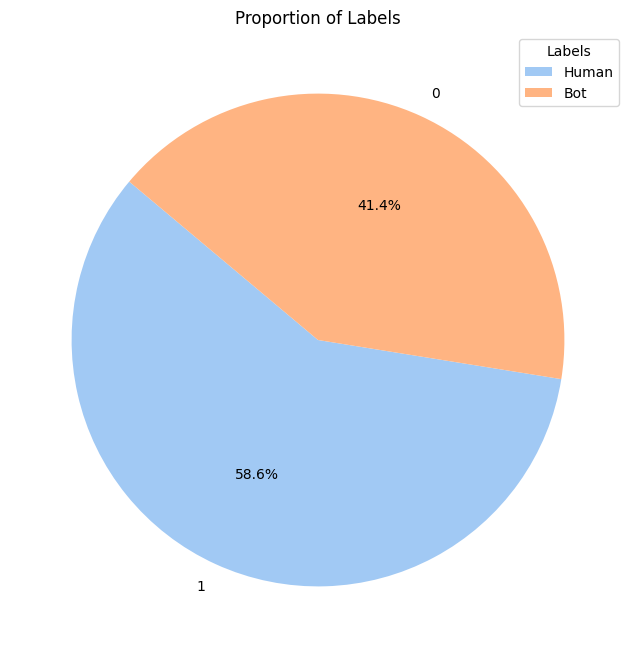

In [33]:
# Plotting the pie chart
plt.figure(figsize=(8, 8))
sns.set_palette("pastel")
plt.pie(labels_count, labels=labels_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Labels')
plt.legend(labels=['Human', 'Bot'], title='Labels', loc='upper right')
plt.show()

#### 6.2. Visualize tweet wordcloud

In [34]:
from wordcloud import WordCloud

In [35]:
def wordcloud(tweet):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tweet)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

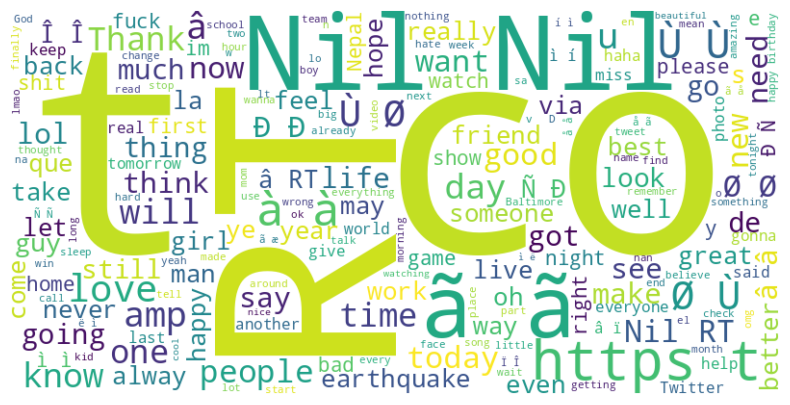

In [36]:
genuine = ' '.join(twitter_df[twitter_df['label'] == 0]['tweets'])

wordcloud(genuine)

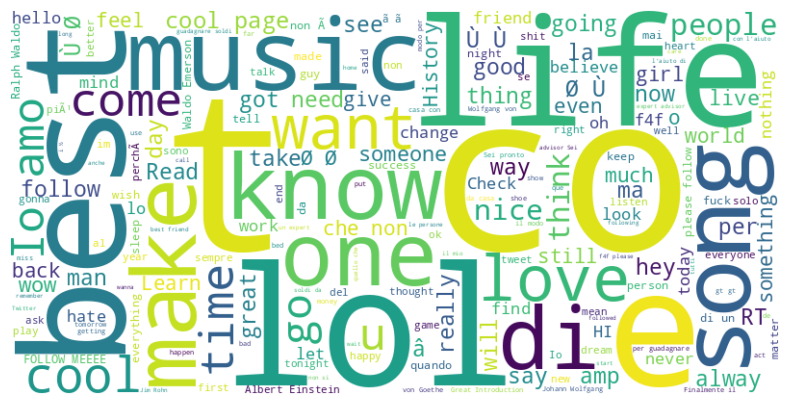

In [37]:
spam = ' '.join(twitter_df[twitter_df['label'] == 1]['tweets'])

wordcloud(spam)

### 7. Data Preprocessing

#### 7.1. Drop id column

In [38]:
twitter_df = twitter_df.drop(columns=['user_id'], axis=1)

#### 7.2. Separate features from target

In [39]:
features_df = twitter_df.drop(columns=['label'])

target = twitter_df['label']

#### 7.3. Numeric columns scaling

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
# Features before scaling
features_df.describe()

,retweets,replies,favoriteC,hashtag,url,mentions,intertime,ffratio,statuses_count,followers_count,friends_count,favourites_count,listed_count
count,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000,8.386000e+03,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000
mean,0.037754,0.185191,1330.809309,0.082080,0.052354,0.247521,5.472161e+04,5.327330,7904.002862,935.443596,607.788695,1958.039828,9.367040
std,0.114763,0.186389,6781.741840,0.172609,0.139065,0.287902,1.458486e+05,7.326655,21751.073395,12328.684645,1978.409439,7799.806277,104.640515
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.924858,58.000000,5.000000,39.000000,0.000000,0.000000
50%,0.000000,0.144767,0.000000,0.057692,0.000000,0.282853,1.519714e+04,2.252047,219.500000,55.000000,90.000000,0.000000,0.000000
75%,0.002074,0.367521,54.000000,0.091112,0.021598,0.364706,9.892220e+04,7.237500,7408.250000,511.750000,470.750000,756.000000,3.000000
max,0.916364,0.945455,313954.000000,6.364655,1.064047,2.699906,1.009320e+07,49.000000,399555.000000,986837.000000,90861.000000,313954.000000,6166.000000


In [42]:
# Select numeric columns
num_cols = features_df.select_dtypes(include=np.number).columns.tolist()

In [43]:
scaler = MinMaxScaler()
scaled_df = pd.DataFrame()

scaled_output = scaler.fit_transform(features_df[num_cols])

scaled_df[num_cols] = scaled_output

In [44]:
# Features after scaling
scaled_df.describe()

,retweets,replies,favoriteC,hashtag,url,mentions,intertime,ffratio,statuses_count,followers_count,friends_count,favourites_count,listed_count
count,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000
mean,0.041200,0.195875,0.004239,0.012896,0.049203,0.091678,0.005422,0.108721,0.019775,0.000948,0.006689,0.006237,0.001519
std,0.125237,0.197142,0.021601,0.027120,0.130694,0.106634,0.014450,0.149524,0.054439,0.012493,0.021774,0.024844,0.016971
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018875,0.000138,0.000005,0.000429,0.000000,0.000000
50%,0.000000,0.153119,0.000000,0.009064,0.000000,0.104764,0.001506,0.045960,0.000542,0.000056,0.000991,0.000000,0.000000
75%,0.002264,0.388725,0.000172,0.014315,0.020298,0.135081,0.009801,0.147704,0.018534,0.000519,0.005181,0.002408,0.000487
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 7.5. Clean user tweets

In [45]:
import re

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [46]:
# Kaggle required command
!unzip -o /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/ > null

In [47]:
def preprocess_tweet(tweet):
    # Remove links
    tweet = re.sub(r'http\S+', '', tweet)
    
    # Remove @username
    tweet = re.sub(r'@\w+', '', tweet)
    
    # Remove "retweet" tag
    tweet = tweet.replace('RT', '')
    
    # Remove non-alphanumeric characters
    tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    
    # Tokenization
    tokens = word_tokenize(tweet)
    
    # Remove punctuation and convert to lowercase
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Perform lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return lemmatized_tokens

In [48]:
# sample unprocessed tweet
features_df['tweets'][3]

'RT @steviebuckys: do i look aesthetic yet http://t.co/PCDWAyv2Bv @steviebuckys MARRY ME RT @mattrnurdock: SCARLETT JOHANSSON DESERVES BETTER http://t.co/uYGJaO27vM my favorite cutie patootiesâ\x98ºï¸\x8f http://t.co/63625heBza RT @ljpphotos: http://t.co/1OselEytZm RT @Tweet_Palestine: Ethiopians in #Israel serve in the army yesterday they protested against Israeli police brutality Israeli racism http:â\x80¦ RT @PIMPDADDYSYD: Im gonna be singing its gonna be may all day http://t.co/0gIzfmCvLA RT @TIME: Let Justin Timberlake remind you that â\x80\x98Itâ\x80\x99s gonna be Mayâ\x80\x99 http://t.co/ZAyaRSmukf Happy Friday :) RT @AyeshaLucarelli: One God, Allah. #Quran http://t.co/qo2FrzK8ju RT @damnantman: power couple af http://t.co/ji60f2obSf'

In [49]:
# sample processed tweet
' '.join(preprocess_tweet(features_df['tweets'][3]))

'look aesthetic yet marry scarlett johansson deserves better favorite cutie patooties ethiopian israel serve army yesterday protested israeli police brutality israeli racism im gon na singing gon na may day let justin timberlake remind gon na may happy friday one god allah quran power couple af'

#### 7.6. Vectorize user tweets 

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
vectorizer = TfidfVectorizer(tokenizer=preprocess_tweet)

In [52]:
tweets_transformed = vectorizer.fit_transform(features_df['tweets'])

tweets_transformed_df = pd.DataFrame(tweets_transformed.toarray(), columns=vectorizer.get_feature_names_out())

In [53]:
# show the first 50 vocabularies
tweets_transformed_df.columns[:50]

Index(['aa', 'aaa', 'aaaa', 'aaaaaaaaaaaaa', 'aaaaaaaaaaaaaaa', 'aaaaaaahh',
       'aaaaahhhh', 'aaaaarrghhhhh', 'aaaah', 'aaai', 'aaand', 'aab', 'aac',
       'aadvantage', 'aaghhhhh', 'aah', 'aahhh', 'aai', 'aaj', 'aako', 'aal',
       'aaliveeeee', 'aaliyah', 'aampe', 'aampm', 'aan', 'aano', 'aanpassen',
       'aantrekken', 'aao', 'aap', 'aapke', 'aapl', 'aapocalypse', 'aar',
       'aarin', 'aaron', 'aaronhernandez', 'ab', 'abaialo', 'abandon',
       'abandoned', 'abang', 'abate', 'abba', 'abbagliante', 'abbagliati',
       'abbaiare', 'abbamo', 'abbandona'],
      dtype='object')

#### 7.7. Combine all features (tweet_info and tweets)

In [54]:
X = pd.concat([scaled_df, tweets_transformed_df], axis=1)

y = twitter_df['label']

In [55]:
X.head()

,retweets,replies,favoriteC,hashtag,url,mentions,intertime,ffratio,statuses_count,followers_count,...,zwartwit,zwei,zyngashutterfly,zz,zzo,zzz,zzzquil,zzzs,zzzzzz,zzzzzzz
0,0.000000,0.000000,0.000844,0.000000,0.000000,0.000000,0.000000,0.032575,0.005441,0.000211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.012652,0.000000,0.000000,0.000000,0.000000,0.029994,0.006650,0.000334,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.003774,0.000000,0.000000,0.000000,0.000000,0.021761,0.003131,0.000168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.370083,0.292672,0.000060,0.023177,0.091646,0.305854,0.000053,0.008906,0.507981,0.002278,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000,0.000000,0.076774,0.000198,0.000021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
# Check if the number of observations match

assert X.shape[0] == y.shape[0]

#### 7.8. Split Data into Training and Test Set

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [59]:
print(f"The shape of the training data is {X_train.shape}")
print(f"The shape of the test data is {X_test.shape}")

The shape of the training data is (6708, 46738)
The shape of the test data is (1678, 46738)


### 8. Model Building

In [60]:
from sklearn.ensemble import RandomForestClassifier

#### 8.1 Build Random Forest Classifier model

In [61]:
rf_classifier = RandomForestClassifier(random_state=42)

In [62]:
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

#### 8.2 Evaluate Classifier

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

In [64]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [65]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9869
Precision: 0.9979
Recall: 0.9792
F1-Score: 0.9884


#### 8.3 Confusion Matrix Plot

In [66]:
cm = confusion_matrix(y_test, y_pred)

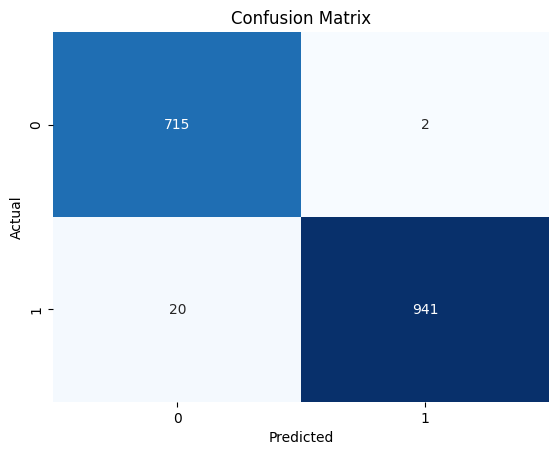

In [67]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### 8.4. ROC-AUC Plot

In [68]:
y_prob = rf_classifier.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

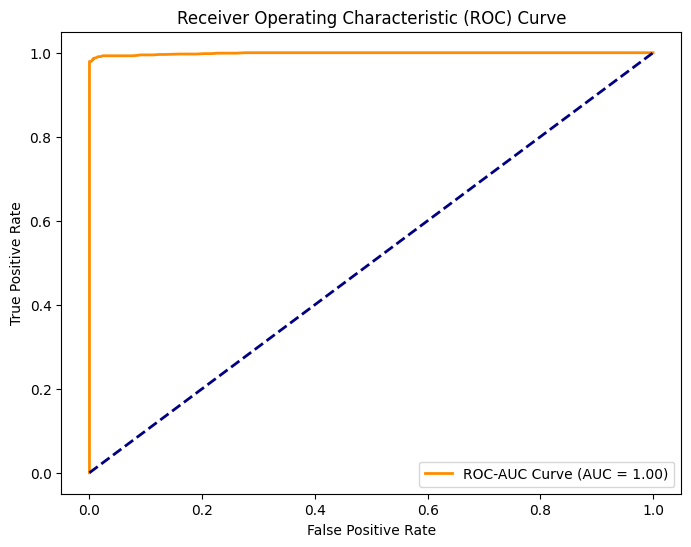

In [69]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC-AUC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### 8.5. Model Interpretation: Feature Importance

In [70]:
feature_importance = rf_classifier.feature_importances_
feature_names = X_train.columns

In [71]:
# Get indices of top 10 features
top_indices = feature_importance.argsort()[-10:][::-1]

# Extract top 10 feature names and importance values
top_feature_names = feature_names[top_indices]
top_feature_importance = feature_importance[top_indices]

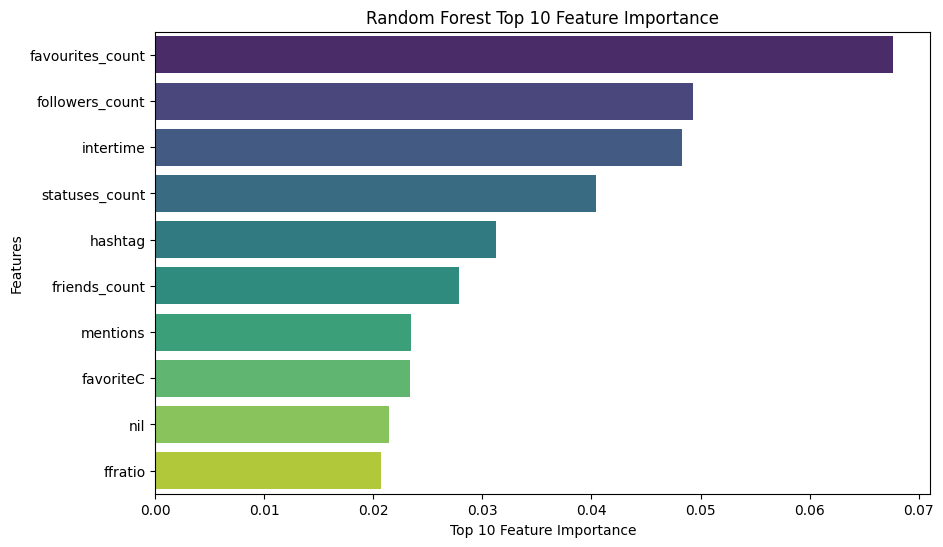

In [72]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_feature_importance, y=top_feature_names, orient='h', palette='viridis')
plt.xlabel('Top 10 Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Top 10 Feature Importance')
plt.show()